In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df=pd.read_csv("C:/Users/user/Downloads/Data/features_3_sec.csv")

In [3]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])

In [5]:
cols=list(df.columns)
print(cols)
train_cols=cols[1:-1]
test_cols=cols[-1]
print(train_cols)
print(len(train_cols))

['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'label']
['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df[train_cols])
df[train_cols]=scaler.transform(df[train_cols])
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,0.0,-0.487808,0.640520,-0.006624,0.235568,-0.566828,-0.572791,-0.493983,-0.009229,...,-0.299108,0.168647,-0.425137,-0.003423,-0.376938,-0.499464,-0.513562,0.128414,-0.291781,0
1,blues.00000.1.wav,0.0,-0.403142,0.131835,-0.264944,-0.342134,-0.508798,-0.749862,-0.425382,-0.519010,...,0.428544,-0.327031,-0.310040,-0.112125,-0.032083,-0.066593,1.011384,1.275780,0.056425,0
2,blues.00000.2.wav,0.0,-0.361694,0.764491,0.016695,0.542195,-0.546245,-0.701852,-0.288365,-0.425734,...,0.503695,0.428053,-0.648762,0.316311,-0.177372,0.109337,-0.046244,0.653907,-0.521458,0
3,blues.00000.3.wav,0.0,-0.175714,0.205477,0.024885,-0.063820,-0.723482,-0.700599,-0.517344,-0.348881,...,-0.065309,0.062981,-0.649076,0.092384,-0.464121,-0.211882,-0.099501,0.865880,-0.544744,0
4,blues.00000.4.wav,0.0,-0.485895,0.337521,0.181345,-0.272072,-0.756246,-0.774827,-0.538557,-0.572962,...,-0.570609,0.856651,-0.167089,0.183265,-0.029476,-0.175130,-0.678995,0.276899,-0.606692,0


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df[train_cols],df[test_cols],test_size=0.2)
from sklearn.feature_selection import f_classif, SelectKBest
sel_f = SelectKBest(f_classif, k=30)    # select 30 features
X_train_chi2 = sel_f.fit_transform(X_train, y_train)
print(sel_f.get_support())
lsb=sel_f.get_support()
ls=[]
for i in range(len(train_cols)):
  if lsb[i]==True:
    ls.append(train_cols[i])
print(ls)
train_cols=ls
X_train, X_test, y_train, y_test=train_test_split(df[train_cols],df[test_cols],test_size=0.2)
print(X_train.shape)

[False  True  True  True  True  True  True  True  True  True  True  True
  True False False False  True False  True False  True False  True False
  True  True  True  True  True  True  True  True  True False  True False
 False False False False  True False  True False False False  True False
 False False  True False False False False False False False]
['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'perceptr_var', 'mfcc1_mean', 'mfcc2_mean', 'mfcc3_mean', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc9_mean', 'mfcc12_mean', 'mfcc13_mean', 'mfcc15_mean', 'mfcc17_mean']
(7992, 30)


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [8]:
n=len(set(y_train))
from sklearn.neighbors import KNeighborsClassifier
modelk=KNeighborsClassifier(n_neighbors=n)
modelk.fit(X_train,y_train)
y_predk=modelk.predict(X_test)
print(accuracy_score(y_predk,y_test))

0.8353353353353353


In [9]:
from sklearn.linear_model import SGDClassifier
model_SGD = SGDClassifier(loss= "log")
model_SGD.fit(X_train,y_train)
y_predSGD=model_SGD.predict(X_test)
print(accuracy_score(y_predSGD,y_test))


0.6061061061061062


In [10]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
clf = OneVsRestClassifier(GaussianNB()).fit(X_train,y_train)
y_predclf=clf.predict(X_test)
print(accuracy_score(y_predclf,y_test))

0.471971971971972


In [11]:
nb_classifier = GaussianNB()
from sklearn.model_selection import GridSearchCV
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB,    # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 0.01873817422860384}

In [12]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB(var_smoothing=gs_NB.best_params_['var_smoothing'] )
model.fit(X_train,y_train)

GaussianNB(var_smoothing=0.01873817422860384)

In [13]:
y_pred=model.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.4754754754754755


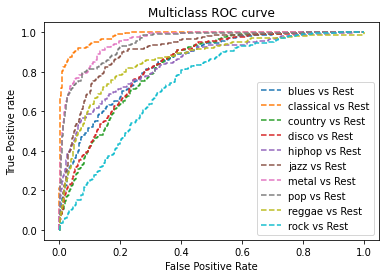

In [14]:
# Get class probability scores
pred_prob = model.predict_proba(X_test)
classes=['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(classes)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# Plot the ROC chart
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], linestyle='--', label=classes[i] + ' vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()